## Library

Run Library Terlebih Dahulu

In [1]:
import imageio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
import cv2
from skimage.color import rgb2lab, deltaE_cie76
from collections import Counter
import os 
from PIL import Image
import requests
from io import BytesIO
from skimage import io
from numpy import asarray

## Tugas 1

#### Array RGB Pada Image

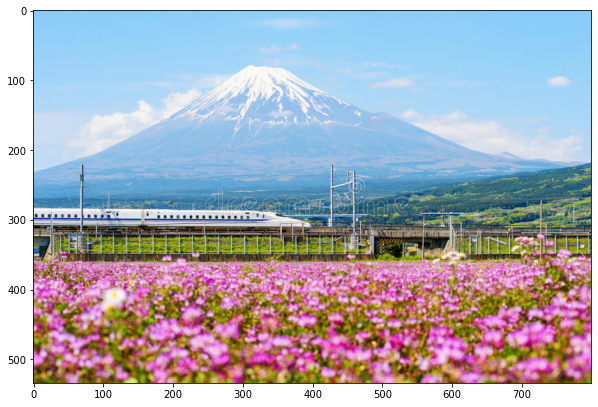

In [161]:
pic=imageio.imread('https://thumbs.dreamstime.com/b/bullet-train-mt-fuji-shinkanzen-passes-shibazakura-spring-shizuoka-japan-92477611.jpg')
plt.figure(figsize=(10,10))
plt.imshow(pic)

In [3]:
print(pic)

[[[139 203 249]
  [139 203 249]
  [139 203 249]
  ...
  [136 202 250]
  [136 202 250]
  [136 202 250]]

 [[139 203 249]
  [139 203 249]
  [139 203 249]
  ...
  [136 202 250]
  [136 202 250]
  [136 202 250]]

 [[139 203 249]
  [139 203 249]
  [139 203 249]
  ...
  [136 202 250]
  [136 202 250]
  [136 202 250]]

 ...

 [[128 108   0]
  [129 107   0]
  [123  98   0]
  ...
  [109 160   3]
  [104 157   7]
  [104 153   9]]

 [[126 105   0]
  [127 104   0]
  [120  95   0]
  ...
  [105 161   2]
  [102 157   4]
  [ 99 153   7]]

 [[128 107   2]
  [126 104   2]
  [118  92   0]
  ...
  [100 155   0]
  [ 95 151   0]
  [ 91 146   1]]]


In [4]:
 print('Type of the image : ',type(pic))
 print('Shape of the image : {}'.format(pic.shape))
 print('Hight of the image {}'.format(pic.shape[0]))
 print('Width of the image {}'.format(pic.shape[1]))
 print('Dimension of the Image {}'.format(pic.ndim)) 

Type of the image :  <class 'imageio.core.util.Array'>
Shape of the image : (534, 800, 3)
Hight of the image 534
Width of the image 800
Dimension of the Image 3


In [5]:
 print('Image size {}'.format(pic.size))
 print('Maximum RGB value in this image {}'.format(pic.max()))
 print('Minimum RGB value in this image {}'.format(pic.min())) 

Image size 1281600
Maximum RGB value in this image 255
Minimum RGB value in this image 0


In [6]:
 print("The type of image is {}".format(type(pic)))
 print("Shape of the image: {}".format(pic.shape)) 

The type of image is <class 'imageio.core.util.Array'>
Shape of the image: (534, 800, 3)


In [7]:
def RGB_HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [8]:
 def get_colors(image, number_of_colors, show_chart):
     reshaped_image = cv2.resize(pic, (600, 400))
     reshaped_image = reshaped_image.reshape(reshaped_image.shape[0]*reshaped_image.shape[1], 3)
     clf = KMeans(n_clusters = number_of_colors)
     labels = clf.fit_predict(reshaped_image)
     counts = Counter(labels)
     counts = dict(sorted(counts.items()))
     center_colors = clf.cluster_centers_
     ordered_colors = [center_colors[i] for i in counts.keys()]
     hex_colors = [RGB_HEX(ordered_colors[i]) for i in counts.keys()]
     rgb_colors = [ordered_colors[i] for i in counts.keys()]
     if (show_chart):
         plt.figure(figsize = (8, 6))
         plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
     return rgb_colors 

[array([82.42189275, 63.81891553, 30.75153943]),
 array([155.38608394, 204.52472359, 241.57807236]),
 array([219.27145496, 136.26740551, 192.59356351]),
 array([ 67.92103775, 105.54752183, 118.59620579]),
 array([178.34373564, 113.83737938, 115.51952826]),
 array([145.02888177, 124.47704857,  31.31799076]),
 array([219.2922585 , 218.01412955, 235.0560348 ]),
 array([101.89270332, 157.19210793, 194.83652141])]

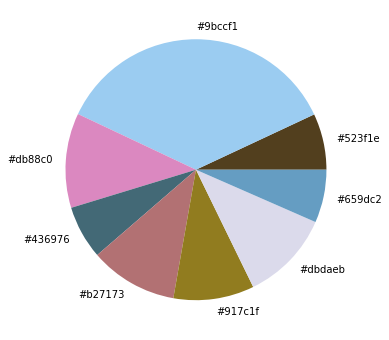

In [9]:
get_colors(pic, 8, True)

## Tugas 2 
#### Implementasi Histogram dan Grayscale dalam Bahasa Pemrograman

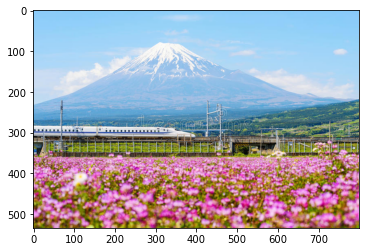

In [140]:
response = requests.get('https://thumbs.dreamstime.com/b/bullet-train-mt-fuji-shinkanzen-passes-shibazakura-spring-shizuoka-japan-92477611.jpg')
img = Image.open(BytesIO(response.content))
img.save('shinkansen.jpg')
plt.imshow(img)

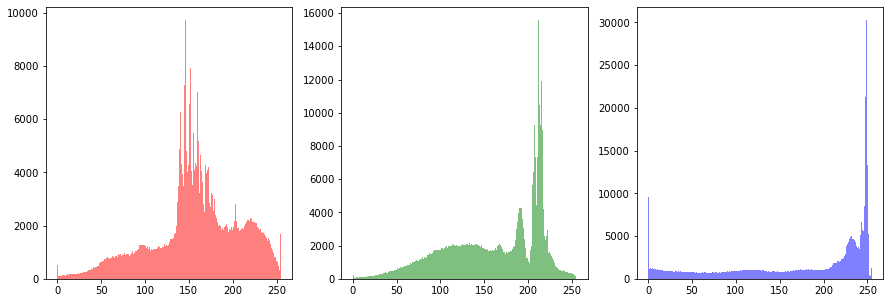

In [139]:
#Histogram Warna
response = requests.get('https://thumbs.dreamstime.com/b/bullet-train-mt-fuji-shinkanzen-passes-shibazakura-spring-shizuoka-japan-92477611.jpg')
cf = Image.open(BytesIO(response.content))
lbr, tgi = (cf.size)

#larik kosong
bakir = []
bakig = []
bakib = []

#data histogram
for x in range(lbr):
    for y in range(tgi):
        r, g, b = cf.getpixel((x,y))
        bakir.append(r)
        bakig.append(g)
        bakib.append(b)
#gxy = baki

# tampilan dalam bentuk diagram batang
jb = 255
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
#axs[0].imshow(cf)
axs[0].hist(bakir, jb, facecolor ='red', alpha=0.5)
axs[1].hist(bakig, jb, facecolor ='green', alpha=0.5)
axs[2].hist(bakib, jb, facecolor ='blue', alpha=0.5)
plt.show()

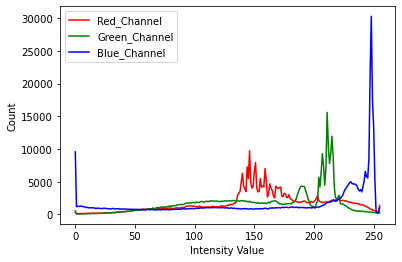

In [141]:
response = requests.get('https://thumbs.dreamstime.com/b/bullet-train-mt-fuji-shinkanzen-passes-shibazakura-spring-shizuoka-japan-92477611.jpg')
cfW = Image.open(BytesIO(response.content))
r, g, b = cfW.split()

btg = list(range(256))
plt.plot(btg, r.histogram(), 'r')
plt.plot(btg, g.histogram(), 'g')
plt.plot(btg, b.histogram(), 'b')
plt.xlabel('Intensity Value')
plt.ylabel('Count')
plt.legend(['Red_Channel', 'Green_Channel', 'Blue_Channel'])
plt.show()

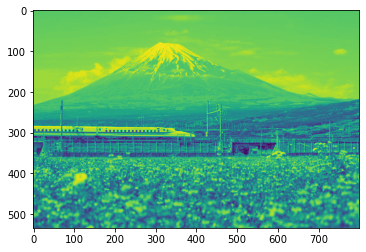

In [149]:
imgGray = img.convert('L')
imgGray.save('shinkansen_gray.jpg')
plt.imshow(imgGray)

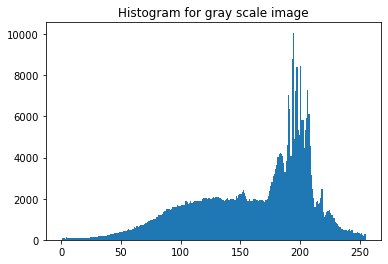

In [150]:
histogray = cv2.imread('shinkansen_gray.jpg')

plt.hist(gray.ravel(), 255, [0, 255])
plt.title('Histogram for gray scale image')
plt.show()

## Tugas 3

#### Transformasi Ruang Warna YUV, YCbCr

[[[249 203 139]
  [249 203 139]
  [249 203 139]
  ...
  [250 202 138]
  [250 202 138]
  [250 202 138]]

 [[249 203 139]
  [249 203 139]
  [249 203 139]
  ...
  [250 202 138]
  [250 202 138]
  [250 202 138]]

 [[249 203 139]
  [249 203 139]
  [249 203 139]
  ...
  [250 202 138]
  [250 202 138]
  [250 202 138]]

 ...

 [[  0 105 132]
  [  2 105 130]
  [  0  98 122]
  ...
  [  8 156 114]
  [  7 155 109]
  [  5 154 104]]

 [[  0 102 131]
  [  2 102 130]
  [  0  94 120]
  ...
  [  7 156 112]
  [  6 155 105]
  [  3 153 100]]

 [[  4 104 133]
  [  3 102 130]
  [  0  92 118]
  ...
  [  2 152 106]
  [  0 149  99]
  [  0 146  92]]]


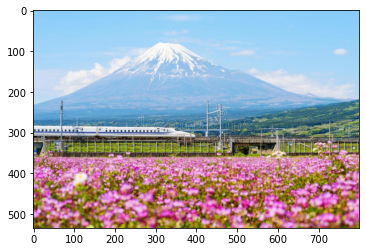

In [179]:
img2 = cv2.imread("shinkansen.jpg")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
rgbdata = asarray(img2)
print(rgbdata)

[[[209  94 163]
  [209  94 163]
  [209  94 163]
  ...
  [209  93 164]
  [209  93 164]
  [209  93 164]]

 [[209  94 163]
  [209  94 163]
  [209  94 163]
  ...
  [209  93 164]
  [209  93 164]
  [209  93 164]]

 [[209  94 163]
  [209  94 163]
  [209  94 163]
  ...
  [209  93 164]
  [209  93 164]
  [209  93 164]]

 ...

 [[ 77 155  60]
  [ 77 154  62]
  [ 71 153  66]
  ...
  [107 131  41]
  [106 129  41]
  [104 128  41]]

 [[ 75 156  62]
  [ 75 155  64]
  [ 69 153  67]
  ...
  [106 131  41]
  [105 128  41]
  [102 127  41]]

 [[ 77 156  64]
  [ 76 155  64]
  [ 67 153  69]
  ...
  [102 130  40]
  [ 99 128  41]
  [ 96 126  44]]]


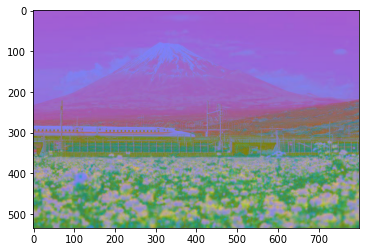

In [180]:
yuv = cv2.cvtColor(img2, cv2.COLOR_RGB2YUV)
plt.imshow(cv2.cvtColor(yuv, cv2.COLOR_BGR2RGB))
yuvdata = asarray(yuv)
print(yuvdata)

[[[209 157  89]
  [209 157  89]
  [209 157  89]
  ...
  [209 157  88]
  [209 157  88]
  [209 157  88]]

 [[209 157  89]
  [209 157  89]
  [209 157  89]
  ...
  [209 157  88]
  [209 157  88]
  [209 157  88]]

 [[209 157  89]
  [209 157  89]
  [209 157  89]
  ...
  [209 157  88]
  [209 157  88]
  [209 157  88]]

 ...

 [[ 77  73 159]
  [ 77  75 158]
  [ 71  77 157]
  ...
  [107  57 132]
  [106  57 130]
  [104  57 128]]

 [[ 75  75 160]
  [ 75  76 159]
  [ 69  79 157]
  ...
  [106  57 131]
  [105  57 128]
  [102  57 127]]

 [[ 77  76 160]
  [ 76  76 158]
  [ 67  80 157]
  ...
  [102  57 130]
  [ 99  57 128]
  [ 96  60 126]]]


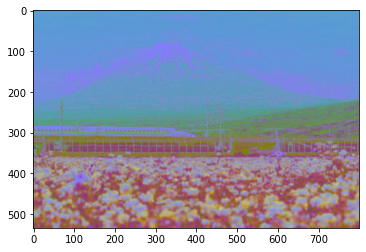

In [183]:
ycrcb = cv2.cvtColor(img2, cv2.COLOR_RGB2YCrCb)
plt.imshow(cv2.cvtColor(ycrcb, cv2.COLOR_BGR2RGB))
ycrcbdata = asarray(ycrcb)
print(ycrcbdata)

## Tugas 4
#### Deteksi Tepi Sobell

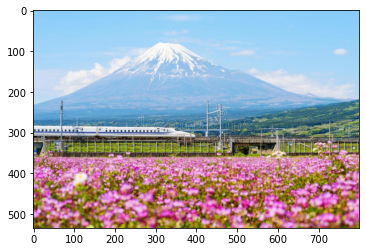

In [115]:
img7 = cv2.imread('shinkansen.jpg')


In [116]:
# converting to gray scale
gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)

In [117]:
# remove noise
img4 = cv2.GaussianBlur(gray,(3,3),0)

In [118]:
# convolute with proper kernels
laplacian = cv2.Laplacian(img4,cv2.CV_64F)
sobelx = cv2.Sobel(img4,cv2.CV_64F,1,0,ksize=5)  # x
sobely = cv2.Sobel(img4,cv2.CV_64F,0,1,ksize=5)  # y

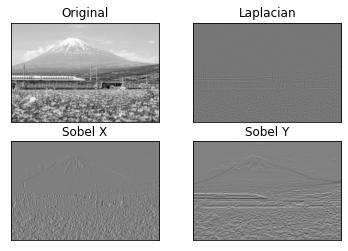

In [119]:
plt.subplot(2,2,1),plt.imshow(img4,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

## Tugas 6
#### Transformasi Citra (Fourier)

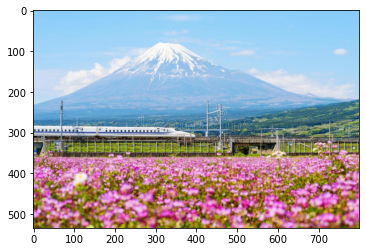

In [8]:
myImg = cv2.imread("shinkansen.jpg")
myImg = np.array(myImg)
plt.imshow(cv2.cvtColor(myImg, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
# membuat grayscale
myGrayImg = cv2.cvtColor(myImg, cv2.COLOR_BGR2GRAY)

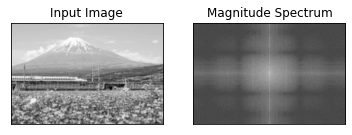

In [11]:
# Buramkan gambar grayscale dengan filter Guassian
imBlur = cv2.blur(myGrayImg,(5,5))
# Ubah gambar menjadi domain frekuensi
f = np.fft.fft2(imBlur)
# Bawa komponen frekuensi-nol ke tengah
fshift = np.fft.fftshift(f)
magnitude_spectrum = 30*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(imBlur, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Tugas 7
#### Opacity (Transparancy Channel)

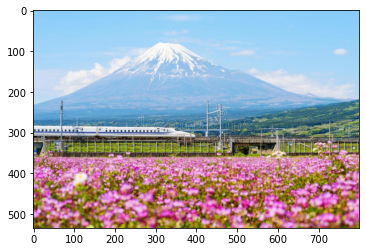

In [48]:
img7 = cv2.imread("shinkansen.jpg")
plt.imshow(cv2.cvtColor(img7, cv2.COLOR_BGR2RGB))

In [49]:
img8 = cv2.imread('shinkansen.jpg')
# Membuat layer dengan cv2
bgra = cv2.cvtColor(img8, cv2.COLOR_BGR2BGRA) 
# Menentukan besaran opacity 1-255
bgra[...,3] = 50
# Save image
cv2.imwrite('result.png',bgra)

True

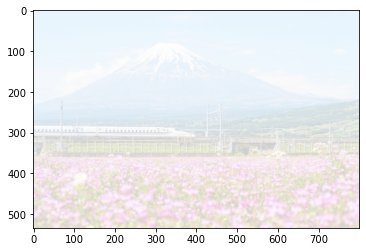

In [50]:
img9 = mpimg.imread('result.png')
imgplot = plt.imshow(img9)
plt.show()